# Anomaly Detection In Credit Card Transactions.

### Objective

Trying to achieve the objective of identifying fraudulent credit card transactions using CRISP-DM process.

- Handle imbalanced dataset using Random Undersampling, Random Oversampling, Random Oversampling using SMOTE analysis.
- Perform exploratory data analysis for data visualization and feature selection.
- Cluster Data into fraudulent and non-fraudulent transactions using dimensionality reduction technique with t-distributed Stochastic Neighbour Embedding.
- Build predictive models using Logistic Regression, K-Nearest Neighbours, Support Vector Machine, Stochastic Gradient Descent.
- Use Ensemble modelling technique and performed Voting Ensemble, bagging with Random Forest Classifier, boosting with XGBoost and AdaBoost.
- Perform model evaluation and comparison of the models using Area under the ROC Curve (Accuracy) and time for speed of detection.

## Business Understanding

+ Credit cards are used by many customers of various financial institutions to perform various online, ATM transactions. 
+ These transactions can sometimes be fraudulent done by people who aim to gain monetary benefit without authorization. 
+ This leads to financial losses for the banks and creates a sense of mistrust between the bank and customer and could be a major source for banks losing their customers and trust. 
+ Hence, it becomes necessary for financial institutions to identify and hold such transactions accountable for security purposes. 
+ The properties of a good fraud detection system are:

     1) It should identify the frauds accurately.
     
     2) It should detecting the frauds quickly. 
     
     3) It should not classify a genuine transaction as fraud.
     

In [1]:
# Import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
import time

## Workflow Diagram

<img src="Workflow_diag.png">

## Data Gathering and Preprocessing (Data understanding)

In [2]:
# Read the data.
df = pd.read_csv("creditcard.csv")
df.shape


(284807, 31)

In [3]:
# Showing the sample data.
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking for null value.
df.isnull().values.any()

False

In [5]:
# Adding a column based on labels.
df['ClassLabel'] = np.where(df['Class']==1, 'Fraud', 'Normal')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,ClassLabel
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Normal
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Normal
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Normal
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Normal


## Exploratory Data Analysis

Understanding the data by asking a few questions that helps the business.

In [6]:
# Splitting the data into different data sets of classes.
Fraud_data = df[df.Class == 1]
Normal_data = df[df.Class == 0]

In [7]:
# Checking the size of the normal transaction data.
Normal_data.shape

(284315, 32)

In [8]:
# Checking the size of the fraudulent transaction data.
Fraud_data.shape

(492, 32)

In [9]:
# function to check percentage of a class 
def calculatePercentage(data):
    CountNormal = len(data[data["Class"]==0]) # normal transaction are repersented by 0
    CountFraud = len(data[data["Class"]==1]) # fraud by 1
    NormalTransactionPercentage = CountNormal/(CountNormal+CountFraud)
    print("Normal transacation % is",NormalTransactionPercentage*100)
    FraudTransacationPercentage= CountFraud/(CountNormal+CountFraud)
    print("Fraud transaction %",FraudTransacationPercentage*100)
    
calculatePercentage(df)

Normal transacation % is 99.82725143693798
Fraud transaction % 0.1727485630620034


##### Statistics of the datasets according to the class.

In [10]:
# Gathering the sense of all data distribution in the fraudulent transaction dataset.
Fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [11]:
# Gathering the sense of all data distribution in the normal transaction dataset.
Normal_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


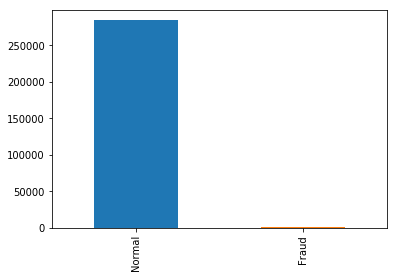

In [12]:
# Seeing the visual representation of fradulent transactions (Class==1) and normal ones(Class== 0)
df['ClassLabel'].value_counts().plot('bar')

#### We can see that the data is unbalanced meaning there are very few fraudelent transactions as compared to normal transactional data.

### Data Visualization

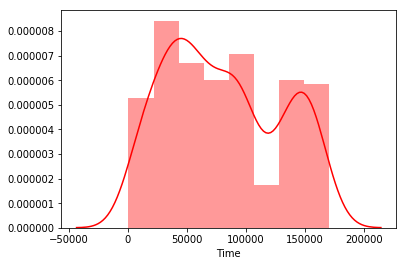

In [13]:
# Seeing the visual representation of fraudulent transactions (Class==1) with time.
sns.distplot(df.Time[df.Class == 1],color= 'R');

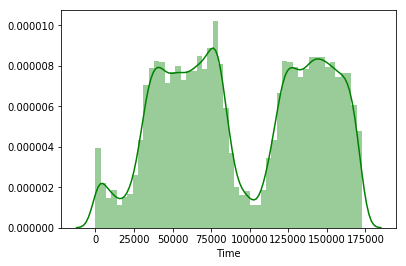

In [14]:
# Seeing the visual representation of normal transactions(Class== 0) with time.
sns.distplot(df.Time[df.Class == 0], color= 'G');

- Observation:  Time doesnt seem to be a significant factor that affects the transactions being classified as fraudulent or normal.

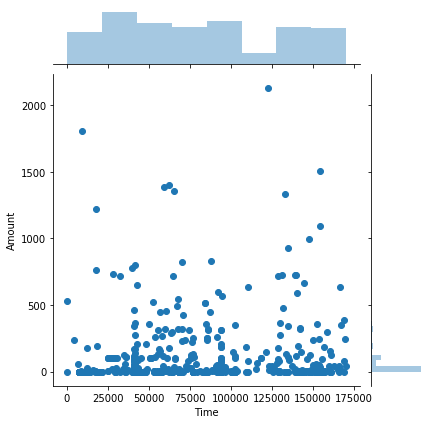

In [15]:
# Plotting Time and Amount with fraudulent class.
sns.jointplot(x="Time", y="Amount", data=df[df.Class==1]);

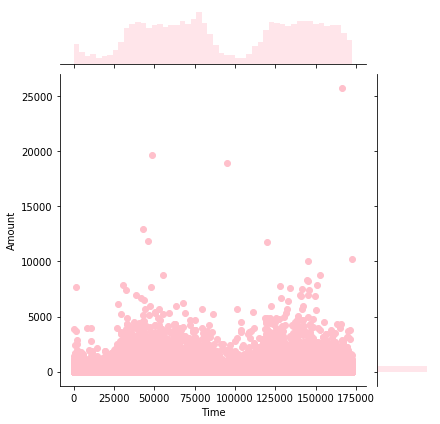

In [16]:
# Plotting Time and Amount with non-fraudulent class.
sns.jointplot(x="Time", y="Amount", data=df[df.Class==0], color='pink');

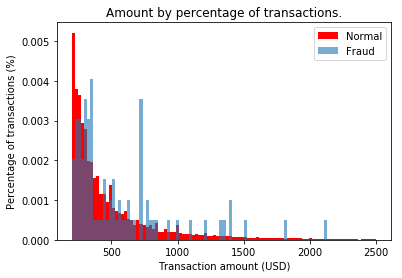

In [17]:
# Transaction amount distribution.
bins = np.linspace(200, 2500, 100)
plt.hist(Normal_data.Amount, bins, alpha=1, normed=True, label='Normal', color = 'Red')
plt.hist(Fraud_data.Amount, bins, alpha=0.6, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions.")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

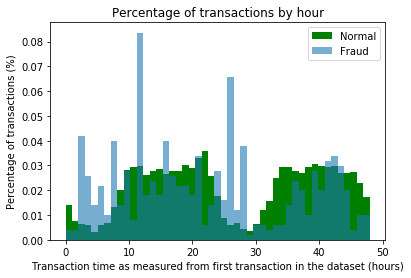

In [18]:
# Transaction Distribution by time.
bins = np.linspace(0, 48, 48) #48 hours
plt.hist((Normal_data.Time/(60*60)), bins, alpha=1, normed=True, label='Normal', color = 'G')
plt.hist((Fraud_data.Time/(60*60)), bins, alpha=0.6, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

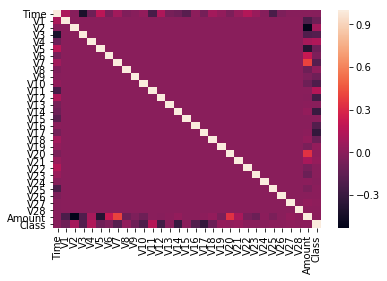

In [19]:
# Correlation between features of the dataset.
correlation = df.corr()
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

In [20]:
correlation.style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1,0.117396,-0.0105933,-0.419618,-0.10526,0.173072,-0.0630165,0.0847144,-0.0369494,-0.00866043,0.0306166,-0.247689,0.124348,-0.065902,-0.0987568,-0.183453,0.0119029,-0.0732972,0.0904381,0.0289753,-0.050866,0.0447357,0.144059,0.0511424,-0.0161819,-0.233083,-0.0414071,-0.00513459,-0.00941269,-0.0105964,-0.0123226
V1,0.117396,1,4.69735e-17,-1.42439e-15,1.75532e-17,6.39116e-17,2.39807e-16,1.99155e-15,-9.49068e-17,2.16958e-16,7.43382e-17,2.43858e-16,2.42209e-16,-2.11546e-16,9.35258e-16,-3.25245e-16,6.30879e-16,-5.01152e-16,2.87013e-16,1.81813e-16,1.03696e-16,-1.75507e-16,7.47737e-17,9.80871e-16,7.35427e-17,-9.80536e-16,-8.6219e-17,3.20823e-17,9.82089e-16,-0.227709,-0.101347
V2,-0.0105933,4.69735e-17,1,2.51218e-16,-1.12639e-16,-2.03987e-16,5.02468e-16,3.96649e-16,-4.41398e-17,-5.72872e-17,-4.78239e-16,9.469e-16,-6.58825e-16,3.85452e-16,-2.54104e-16,2.83106e-16,4.9341e-17,-9.88301e-16,2.63665e-16,9.52828e-17,-9.30995e-16,8.44441e-17,2.50083e-16,1.05956e-16,-8.14235e-18,-4.26189e-17,2.60162e-16,-4.47847e-16,-3.67641e-16,-0.531409,0.0912887
V3,-0.419618,-1.42439e-15,2.51218e-16,1,-3.41691e-16,-1.43651e-15,1.43158e-15,2.16857e-15,3.43311e-16,-4.23377e-16,6.28927e-16,-5.50176e-17,2.20652e-16,-6.88337e-16,4.27134e-16,1.12276e-16,1.18336e-15,4.57662e-17,5.42796e-16,2.57677e-16,-9.4293e-16,-2.97197e-17,4.64826e-16,2.11521e-17,-9.35164e-17,4.77116e-16,6.5215e-16,6.23983e-16,7.72695e-16,-0.21088,-0.192961
V4,-0.10526,1.75532e-17,-1.12639e-16,-3.41691e-16,1,-1.94093e-15,-2.71266e-16,1.55633e-16,5.19564e-16,3.85958e-16,6.05549e-16,-2.0836e-16,-5.65796e-16,-1.50613e-16,-8.52244e-17,-1.50772e-16,-6.9392e-16,-4.39793e-16,1.49367e-16,-2.65694e-16,-3.22312e-16,-9.97695e-17,2.09992e-16,6.00253e-17,2.22974e-16,5.39459e-16,-6.17975e-16,-6.40342e-17,-5.86366e-17,0.0987317,0.133447
V5,0.173072,6.39116e-17,-2.03987e-16,-1.43651e-15,-1.94093e-15,1,7.92636e-16,-4.20985e-16,7.58919e-16,4.20521e-16,-6.60172e-16,7.34276e-16,3.76103e-16,-9.57866e-16,-3.6348e-16,-5.13262e-16,-3.51708e-16,1.42573e-16,1.10953e-15,-3.13823e-16,2.07605e-16,-1.3687e-16,5.06003e-16,1.6376e-16,-9.2861e-16,5.6251e-16,9.14469e-16,4.46596e-16,-3.29917e-16,-0.386356,-0.0949743
V6,-0.0630165,2.39807e-16,5.02468e-16,1.43158e-15,-2.71266e-16,7.92636e-16,1,1.42943e-16,-1.70742e-16,1.11445e-16,2.85078e-16,4.8658e-16,2.14059e-16,-2.26806e-16,3.4528e-16,-6.36811e-18,-2.47792e-16,3.56758e-16,2.81147e-16,2.71717e-16,1.89864e-16,-1.5759e-16,-3.3629e-16,-7.23219e-17,-1.26187e-15,1.08193e-15,-2.37841e-16,-2.62382e-16,4.81315e-16,0.215981,-0.0436432
V7,0.0847144,1.99155e-15,3.96649e-16,2.16857e-15,1.55633e-16,-4.20985e-16,1.42943e-16,1,-8.69183e-17,7.93325e-16,3.04333e-17,-1.0841e-15,1.51004e-15,-9.89233e-17,-1.72946e-16,1.93683e-17,2.89367e-16,1.14969e-15,-1.11679e-16,-2.87402e-16,1.74424e-16,1.9386e-16,-1.05813e-15,2.32791e-16,-2.58973e-17,1.17417e-15,-7.33451e-16,-5.88682e-16,-6.83676e-17,0.397311,-0.187257
V8,-0.0369494,-9.49068e-17,-4.41398e-17,3.43311e-16,5.19564e-16,7.58919e-16,-1.70742e-16,-8.69183e-17,1,2.90083e-16,9.05185e-17,1.95475e-16,-6.26606e-17,-2.38295e-16,-1.1311e-16,2.02149e-16,5.02719e-16,-3.50878e-16,-4.09385e-16,-5.33982e-16,-1.09553e-16,-2.41244e-16,5.47556e-16,3.8971e-16,-1.80297e-16,-1.39079e-16,-1.20997e-16,1.73363e-16,-4.48433e-16,-0.103079,0.0198751
V9,-0.00866043,2.16958e-16,-5.72872e-17,-4.23377e-16,3.85958e-16,4.20521e-16,1.11445e-16,7.93325e-16,2.90083e-16,1,-2.77176e-16,4.68234e-16,-2.44523e-15,-2.65035e-16,2.34332e-16,-1.58811e-15,-3.25191e-16,6.53599e-16,1.20384e-16,1.12075e-16,-4.34094e-16,4.57839e-17,2.87186e-17,5.92929e-16,-2.34638e-16,1.09965e-15,-1.38873e-15,-2.28741e-16,9.14678e-16,-0.0442456,-0.0977327


#### Intra Correlation between features of the dataset with respect to different classes.

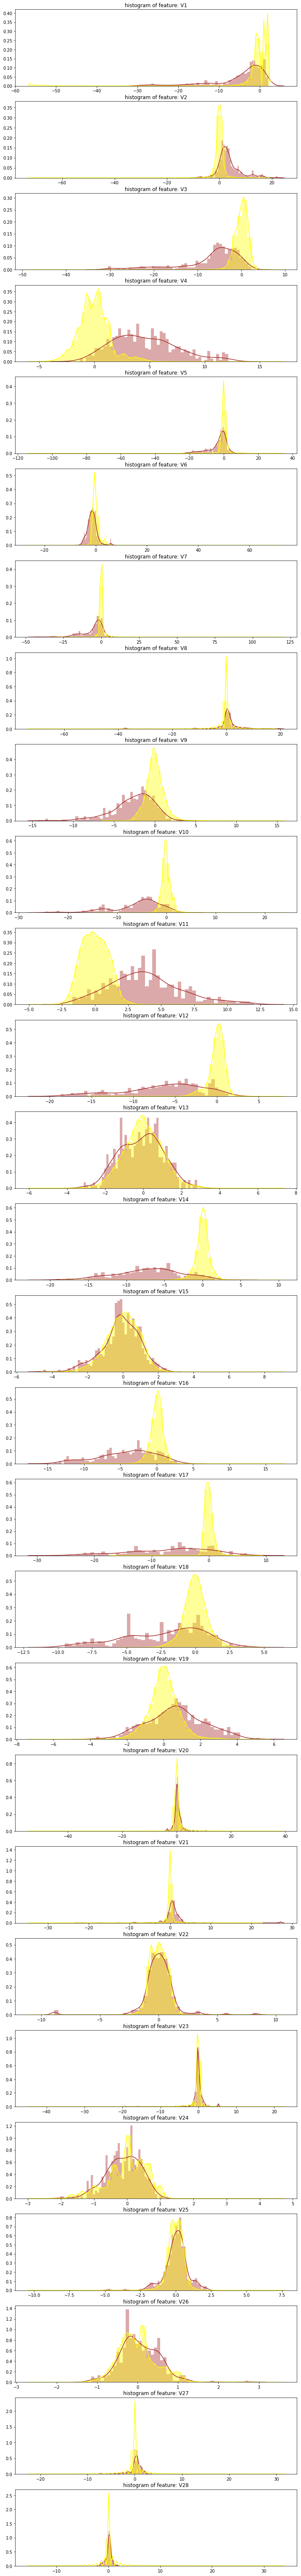

In [21]:
#Select only the anonymized features.
Vfeatures = df.iloc[:,1:29].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, feature in enumerate(df[Vfeatures]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feature][df.Class == 1], bins=50, color = 'Brown')
    sns.distplot(df[feature][df.Class == 0], bins=50, color = 'yellow')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feature))
plt.show()

#### From this we can see that features 'V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8' are redundant and do not vary with class 'Fradulent' and 'Normal'.
#### So the major contributing features that distinguish between the fraudulent transactions and non fraudulent ones are V1-V7, V9, V10, V11, V12, V14, V16- V19, V21

### Feature Scaling

##### As the other columns are transformed into a standard normal form using PCA we need to transform the columns Time and Amount too into standard normal form.

Reference: https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models

To center the data (make it have zero mean and unit standard error), you subtract the mean and then divide the result by the standard deviation.

x′=x−μσ

You do that on the training set of data. But then you have to apply the same transformation to your testing set (e.g. in cross-validation), or to newly obtained examples before forecast. But you have to use the same two parameters μ and σ (values) that you used for centering the training set.

Hence, every sklearn's transform's fit() just calculates the parameters (e.g. μ and σ in case of StandardScaler) and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the transformation to a particular set of examples.

fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set x, but it also returns a transformed x′. Internally, it just calls first fit() and then transform() on the same data.

Reference: https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 
and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value 
subtracted, and then divided by the standard deviation of the whole dataset.

In [22]:
# Trying to normalize the values.
NormalizedDF = df
NormalizedDF['Time'] = StandardScaler().fit_transform(NormalizedDF['Time'].values.reshape(-1, 1))
NormalizedDF['Amount'] = StandardScaler().fit_transform(NormalizedDF['Amount'].values.reshape(-1, 1))
NormalizedDF.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,ClassLabel
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,Normal
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,Normal
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,Normal
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,Normal
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,Normal


### Data Preparation - Dealing with Imbalanced Data.

We use the following techniques to handle imbalance in the dataset to make it balanced:

1. Random Undersampling
2. Random Oversampling
3. Random Oversampling with SMOTE.

###### The need to do balance data:

1. It can cause overfitting of the data and assume the major class as the output for the testing set.
2. We can fail to understand the correlations between the features due to these anomalies as they are in insignificant amount compared to the major class.

In [23]:
# Dropping the columns that don't add to the predictive value.
df_dropped = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8', 'Time', 'Amount', 'ClassLabel'], axis =1)
df_drop = df.drop(['ClassLabel'], axis =1)

In [24]:
# Remove 'class' columns
data_without_labels = df_drop.columns[:-1]
#print(labels)

# Preparing the data for applying the predictive models.

X = df_drop[data_without_labels]
y = df_drop['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
X.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [26]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [27]:
X_train.head(5) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
13367,-1.499405,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,-0.227889
31788,-1.227632,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,-0.188148
84796,-0.723316,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,-0.260194
6243,-1.842671,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,-0.173316
162432,0.427416,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,-0.313888


In [28]:
X_test.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,0.528409,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.346073
127467,-0.346905,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.345313
137900,-0.261789,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.349671
21513,-1.328689,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.289340
134700,-0.292513,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.350191


In [29]:
y_train.head(5)

13367     0
31788     0
84796     0
6243      0
162432    0
Name: Class, dtype: int64

In [30]:
y_test.head(5)

169876    0
127467    0
137900    0
21513     0
134700    0
Name: Class, dtype: int64

In [33]:
P = np.asarray(X)
P

array([[-1.99658302, -1.35980713, -0.07278117, ...,  0.13355838,
        -0.02105305,  0.24496426],
       [-1.99658302,  1.19185711,  0.26615071, ..., -0.0089831 ,
         0.01472417, -0.34247454],
       [-1.99656197, -1.35835406, -1.34016307, ..., -0.05535279,
        -0.05975184,  1.16068593],
       ...,
       [ 1.6419735 ,  1.91956501, -0.30125385, ...,  0.00445477,
        -0.02656083, -0.0818393 ],
       [ 1.6419735 , -0.24044005,  0.53048251, ...,  0.10882073,
         0.10453282, -0.31324853],
       [ 1.64205773, -0.53341252, -0.18973334, ..., -0.00241531,
         0.01364891,  0.51435531]])

In [34]:
P[:,0]

array([-1.99658302, -1.99658302, -1.99656197, ...,  1.6419735 ,
        1.6419735 ,  1.64205773])

In [35]:
P[:,1]

array([-1.35980713,  1.19185711, -1.35835406, ...,  1.91956501,
       -0.24044005, -0.53341252])

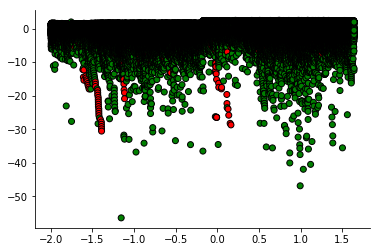

In [38]:
# Original dataset showing the imbalance in the dataset.
import numpy as np
P = np.asarray(X)
colors = ['green' if v == 0 else 'Red' if v == 1 else 'blue' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(P[:, 0], P[:, 1], c=colors, **kwarg_params)
sns.despine()

Random Undersampling may not be better than Random oversampling as we might loose important data, which is maintained in oversampling. Outside of this case however, the performance of the one or the other will be most indistinguishable. 
Sampling doesn't introduce new information in the dataset, it merely shifts it around so as to increase the "numerical stability" of the resulting models.

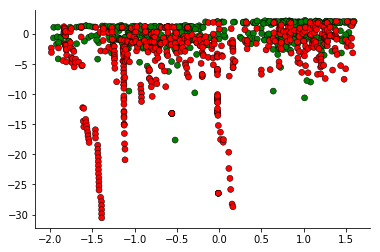

In [32]:
# imblearn implements over-sampling and under-sampling using dedicated classes.
# undersampling the data to balance out the data.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_resample(X, y)
colors = ['green' if v == 0 else 'Red' if v == 1 else 'blue' for v in y_undersampled]
plt.scatter(X_undersampled[:, 0], X_undersampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()

In [33]:
# Getting the count for label =1 in the undersampled data
count = 0
for x in list(y_undersampled):
    if x == 1:
        count=count+1
print(count)

492


In [34]:
# Getting the count for label =0 in the oversampled data
count = 0
for x in list(y_undersampled):
    if x == 0:
        count=count+1
print(count)

492


 #### We can see that the data has been balanced, and the majority class has been undersampled.

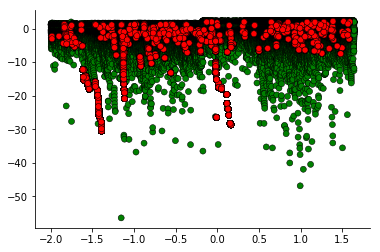

In [35]:
# imblearn implements over-sampling and under-sampling using dedicated classes.
# oversampling the data to balance out the data.
from imblearn.over_sampling import RandomOverSampler
rusO = RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = rusO.fit_resample(X, y)
colors = ['green' if v == 0 else 'Red' if v == 1 else 'blue' for v in y_oversampled]
plt.scatter(X_oversampled[:, 0], X_oversampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()

In [36]:
# Getting the count for label =1 in the undersampled data
count = 0
for x in list(y_oversampled):
    if x == 1:
        count=count+1
print(count)

284315


In [37]:
# Getting the count for label =1 in the undersampled data
count = 0
for x in list(y_oversampled):
    if x == 1:
        count=count+1
print(count)

284315


 #### We can see that the data has been balanced, and the majority class has been oversampled.

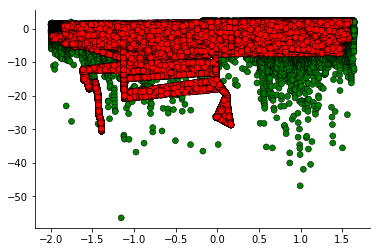

In [38]:
# SMOTE ANALYSIS:  Informed Over Sampling: Synthetic Minority Over-sampling Technique

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_oversampled_sm, y_oversampled_sm = smote.fit_sample(X, y)
colors = ['green' if v == 0 else 'Red' if v == 1 else 'blue' for v in y_oversampled_sm]
plt.scatter(X_oversampled_sm[:, 0], X_oversampled_sm[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()

In [39]:
# Getting the count for label = 1 in the oversampled data
count = 0
for x in list(y_oversampled_sm):
    if x == 1:
        count=count+1
print(count)

284315


In [40]:
# Getting the count for label = 0 in the oversampled data
count = 0
for x in list(y_oversampled_sm):
    if x == 0:
        count=count+1
print(count)

284315


 #### We can see that the data has been balanced, and the majority class has been oversampled using SMOTE.

###### Reference: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

#### Few ways of handling imbalanced datasets:
1.  Collect more data to remove imbalance.
2.  Changing performance metric as accuracy isn't the correct measure and gives the great feeling of your model being good as it majorly predicts the major class as the predicted value. The following could be considered as metrics for imbalanced data.
- Kappa (or Cohen’s kappa): Classification accuracy normalized by the imbalance of the classes in the data.
- ROC Curves: Like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of these values.
3. Sampling the dataset helps as follows:
- You can add copies of instances from the under-represented class called over-sampling.
- You can delete instances from the over-represented class, called under-sampling.
4. Try Generate Synthetic Samples using to randomly sample the attributes from instances in the minority class using SMOTE or the Synthetic Minority Over-sampling Technique. SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.
5. Try different machine learning algorithms like decision trees etc as decision trees often perform well on imbalanced datasets. The splitting rules that look at the class variable used in the creation of the trees, can force both classes to be addressed.
6. Trying penalised models. Penalized classification imposes an additional cost on the model for making classification mistakes on the minority class during training. These penalties can bias the model to pay more attention to the minority class. 
7. Change in perspective.
 - Anomaly detection is the detection of rare events. This might be a machine malfunction indicated through its vibrations or a malicious activity by a program indicated by it’s sequence of system calls. The events are rare and when compared to normal operation.This shift in thinking considers the minor class as the outliers class which might help you think of new ways to separate and classify samples.
- Change detection is similar to anomaly detection except rather than looking for an anomaly it is looking for a change or difference. This might be a change in behavior of a user as observed by usage patterns or bank transactions.

### Applying predictive models on imbalanced data

In [41]:
# Applying K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [42]:
accuracyKNN = accuracy_score(y_test, y_pred)
print("Accuracy of KNN: %.2f%%" % (accuracyKNN * 100.0))

Accuracy of KNN: 99.96%


In [43]:
aucKNN = roc_auc_score(y_test, y_pred)
print("Area under the ROC of KNN: %.4f" % (aucKNN))

Area under the ROC of KNN: 0.8908


In [44]:
# Applying SVM
from sklearn.svm import SVC
SVMclf = SVC()
SVMclf.fit(X_train, y_train)
y_pred = SVMclf.predict(X_test)

In [45]:
accuracySVM = accuracy_score(y_test, y_pred)
print("Accuracy of SVM: %.2f%%" % (accuracySVM * 100.0))

Accuracy of SVM: 99.94%


In [46]:
aucSVM = roc_auc_score(y_test, y_pred)
print("Area under the ROC of SVM: %.4f" % (aucSVM))

Area under the ROC of SVM: 0.8218


In [47]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
Logisticclf = LogisticRegression(random_state=0, solver='lbfgs')
Logisticclf.fit(X_train, y_train)
y_pred = Logisticclf.predict(X_test)

In [48]:
accuracyLR = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression: %.2f%%" % (accuracyLR * 100.0))

Accuracy of Logistic Regression: 99.91%


In [49]:
aucLR = roc_auc_score(y_test, y_pred)
print("Area under the ROC of Logistic Regression: %.4f" % (aucLR))

Area under the ROC of Logistic Regression: 0.7758


In [50]:
from sklearn import linear_model
SGDclf = linear_model.SGDClassifier(max_iter=1000)
SGDclf.fit(X_train, y_train)
y_pred = SGDclf.predict(X_test)

In [51]:
accuracySGD = accuracy_score(y_test, y_pred)
print("Accuracy of Stochastic Gradient Descent: %.2f%%" % (accuracySGD * 100.0))

Accuracy of Stochastic Gradient Descent: 99.91%


In [53]:
aucSGD = roc_auc_score(y_test, y_pred)
print("Area under the ROC of Stochastic Gradient Descent: %.4f" % (aucSGD))

Area under the ROC of Stochastic Gradient Descent: 0.7471


### Predictive Modelling with various machine learning algorithms on balanced data using Random Oversampling with SMOTE.

We will be using the data generated with Random oversampling with SMOTE as Random Undersampling may not be better than Random oversampling as we might loose important data, which is maintained in oversampling. Outside of this case however, the performance of the one or the other will be most indistinguishable. 
Sampling doesn't introduce new information in the dataset, it merely shifts it around so as to increase the "numerical stability" of the resulting models.

Of all the sampling techniques, Random Oversampling with SMOTE is the one that offers the best advantages.

In [54]:
# Applying K Nearest Neighbour with balanced data.
from sklearn.neighbors import KNeighborsClassifier
t0 = time.time()
neighROS = KNeighborsClassifier(n_neighbors=3)
neighROS.fit(X_oversampled_sm, y_oversampled_sm)
y_predKNN = neighROS.predict(X_test)
t1 = time.time()
print("KNN took {:.2} s".format(t1 - t0))

KNN took 1.5e+02 s


In [55]:
accuracyKNNROS = accuracy_score(y_test, y_predKNN)
print("Accuracy of KNN on balanced data is : %.2f%%" % (accuracyKNNROS * 100.0))

Accuracy of KNN on balanced data is : 99.96%


In [56]:
aucKNNRoS = roc_auc_score(y_test, y_predKNN)
print("Area under the ROC of KNN on balanced data is : %.4f" % (aucKNNRoS))

Area under the ROC of KNN on balanced data is : 0.9998


In [57]:
# Applying SVM
from sklearn.svm import SVC
t0 = time.time()
SVMclfROS = SVC()
SVMclfROS.fit(X_oversampled_sm, y_oversampled_sm)
y_predSVM = SVMclfROS.predict(X_test)
t1 = time.time()
print("SVM took {:.2} s".format(t1 - t0))

SVM took 2.7e+03 s


In [58]:
accuracySVMRoS = accuracy_score(y_test, y_predSVM)
print("Accuracy of SVM on balanced data is: %.2f%%" % (accuracySVMRoS * 100.0))

Accuracy of SVM on balanced data is: 99.82%


In [59]:
aucSVMRoS = roc_auc_score(y_test, y_predSVM)
print("Area under the ROC of SVM on balanced data is: %.4f" % (aucSVMRoS))

Area under the ROC of SVM on balanced data is: 0.9991


In [60]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
t0 = time.time()
LogisticclfROS = LogisticRegression(random_state=0, solver='lbfgs')
LogisticclfROS.fit(X_oversampled_sm, y_oversampled_sm)
y_predLR = LogisticclfROS.predict(X_test)
t1 = time.time()
print("Logistic Regression took {:.2} s".format(t1 - t0))

Logistic Regression took 7.6 s


In [61]:
accuracyLRROS = accuracy_score(y_test, y_predLR)
print("Accuracy of Logistic Regression on balanced data is: %.2f%%" % (accuracyLRROS * 100.0))

Accuracy of Logistic Regression on balanced data is: 97.63%


In [62]:
aucLR = roc_auc_score(y_test, y_predLR)
print("Area under the ROC of Logistic Regression on balanced data is: %.4f" % (aucLR))

Area under the ROC of Logistic Regression on balanced data is: 0.9365


In [63]:
from sklearn import linear_model
t0 = time.time()
SGDclfRoS = linear_model.SGDClassifier(max_iter=1000)
SGDclfRoS.fit(X_oversampled_sm, y_oversampled_sm)
y_predSGD = SGDclfRoS.predict(X_test)
t1 = time.time()
print("SGD took {:.2} s".format(t1 - t0))

SGD took 1.2e+02 s


In [64]:
accuracySGDRoS = accuracy_score(y_test, y_predSGD)
print("Accuracy of Stochastic Gradient Descent on balanced data is: %.2f%%" % (accuracySGDRoS * 100.0))

Accuracy of Stochastic Gradient Descent on balanced data is: 97.71%


In [65]:
aucSGDRos = roc_auc_score(y_test, y_predSGD)
print("Area under the ROC of Stochastic Gradient Descent on balanced data is: %.4f" % (aucSGDRos))

Area under the ROC of Stochastic Gradient Descent on balanced data is: 0.9426


In [71]:
# Drawing the confusion  matrix
from sklearn.metrics import confusion_matrix
def plot_conf_matrix(y_test_data, y_pred_data, classifier):
    labels = [0, 1]
    cm = confusion_matrix(y_test_data, y_pred_data, labels)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the %s classifier'% classifier)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()

[[56850    25]
 [    0    87]]


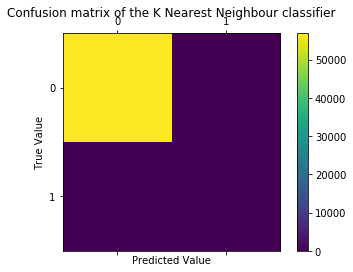

In [72]:
plot_conf_matrix(y_test, y_predKNN, "K Nearest Neighbour")

[[56774   101]
 [    0    87]]


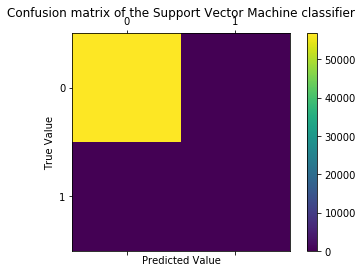

In [73]:
plot_conf_matrix(y_test, y_predSVM, "Support Vector Machine")

[[55536  1339]
 [    9    78]]


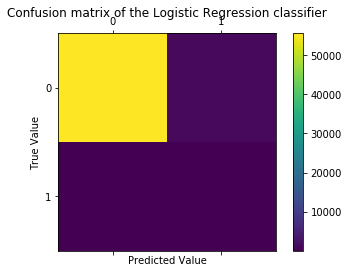

In [74]:
plot_conf_matrix(y_test, y_predLR, "Logistic Regression")

[[55580  1295]
 [    8    79]]


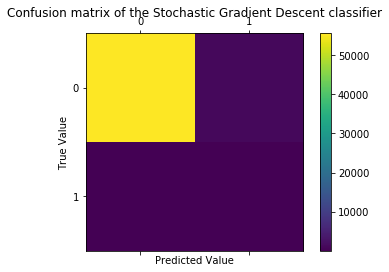

In [76]:
plot_conf_matrix(y_test, y_predSGD, "Stochastic Gradient Descent")

### Clustering using Dimensionality Reduction.

In [77]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

In [78]:
# T-SNE with Original Data.
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

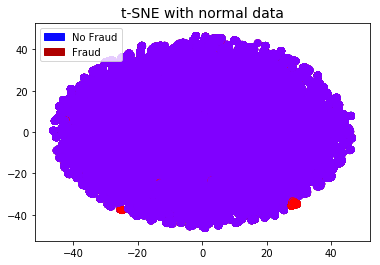

In [79]:
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='rainbow', label='Fraud', linewidths=2)
plt.legend(handles=[mpatches.Patch(color='#0A0AFF', label='No Fraud'), mpatches.Patch(color='#AF0000', label='Fraud')])
plt.title('t-SNE with normal data', fontsize=14)
plt.show()


In [80]:
# T-SNE with Random undersampled balanced data
X_reduced_tsne_undersample = TSNE(n_components=2, random_state=42).fit_transform(X_undersampled)

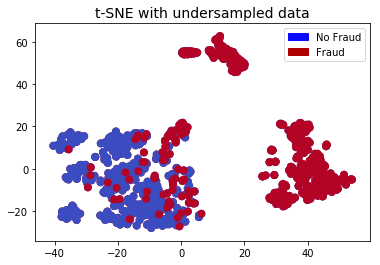

In [82]:
# T-SNE with Undersampled Data.
plt.scatter(X_reduced_tsne_undersample[:,0], X_reduced_tsne_undersample[:,1], c=(y_undersampled == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_tsne_undersample[:,0], X_reduced_tsne_undersample[:,1], c=(y_undersampled == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.legend(handles=[mpatches.Patch(color='#0A0AFF', label='No Fraud'), mpatches.Patch(color='#AF0000', label='Fraud')])
plt.title('t-SNE with undersampled data', fontsize=14)
plt.show()

### Ensemble Learning

The main objective of ensemble methodology is to improve the performance of single classifiers. The approach involves constructing several two stage classifiers from the original data and then aggregate their predictions.

### Bagging

- Random Forest

In [83]:
# Type of bagging ensemble learning with SMOTE data.
from sklearn.ensemble import RandomForestClassifier 
t0 = time.time()
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_oversampled_sm, y_oversampled_sm)
y_predRF = forest.predict(X_test)
t1 = time.time()
print("Random Forest took {:.2} s".format(t1 - t0))
#print('Score: ', forest.score(X_test, y_test))

Random Forest took 7.6e+02 s


In [84]:
accuracyRFRoS = accuracy_score(y_test, y_predRF)
print("Accuracy of Random Forest on balanced data is: %.2f%%" % (accuracyRFRoS * 100.0))

Accuracy of Random Forest on balanced data is: 100.00%


In [85]:
aucRFRos = roc_auc_score(y_test, y_predRF)
print("Area under the ROC of Random Forest on balanced data is: %.4f" % (aucRFRos))

Area under the ROC of Random Forest on balanced data is: 1.0000


[[56875     0]
 [    0    87]]


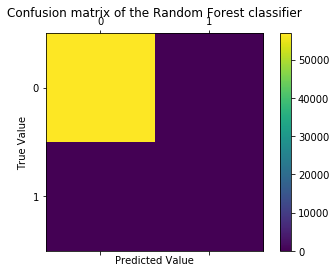

In [86]:
plot_conf_matrix(y_test, y_predRF, "Random Forest")

### Boosting:
- XGBoost
- Ada- Boost

In [131]:
# Converting numpy array to Dataframe for Xgboost.
X_oversampleDF_sm = pd.DataFrame(data=X_oversampled_sm[0:,0:],   
             columns=X_train.columns)  

In [133]:
# Converting numpy array to Dataframe for Xgboost.
y_oversampleDF_sm = pd.DataFrame(data=y_oversampled_sm) 

In [134]:
# Type of boosting ensemble learning with SMOTE data.
from xgboost import XGBClassifier
t0 = time.time()
XGBmodel = XGBClassifier()
XGBmodel.fit(X_oversampleDF_sm, y_oversampleDF_sm)
y_predXGB = XGBmodel.predict(X_test)
t1 = time.time()
print("Xtreme Gradient Boosting took {:.2} s".format(t1 - t0))

Xtreme Gradient Boosting took 2.4e+02 s


In [135]:
accuracyXGBRoS = accuracy_score(y_test, y_predXGB)
print("Accuracy of Xtreme Gradient Boosting on balanced data is: %.2f%%" % (accuracyXGBRoS * 100.0))

Accuracy of Xtreme Gradient Boosting on balanced data is: 98.97%


In [136]:
aucXGBRos = roc_auc_score(y_test, y_predXGB)
print("Area under the ROC of Xtreme Gradient Boosting on balanced data is: %.4f" % (aucXGBRos))

Area under the ROC of Xtreme Gradient Boosting on balanced data is: 0.9834


[[56289   586]
 [    2    85]]


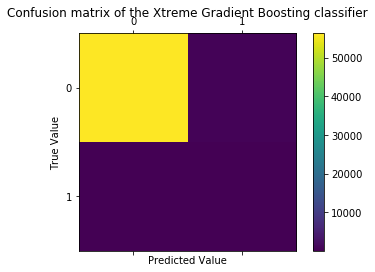

In [137]:
plot_conf_matrix(y_test, y_predXGB, "Xtreme Gradient Boosting")

In [97]:
from sklearn.ensemble import AdaBoostClassifier
t0 = time.time()
ada = AdaBoostClassifier(n_estimators = 100)
ada.fit(X_oversampled_sm, y_oversampled_sm)
y_predAda = ada.predict(X_test)
t1 = time.time()
print("Ada Boosting took {:.2} s".format(t1 - t0))

Ada Boosting took 5e+02 s


In [98]:
accuracyAdaRoS = accuracy_score(y_test, y_predAda)
print("Accuracy of Ada Boosting on balanced data is: %.2f%%" % (accuracyAdaRoS * 100.0))

Accuracy of Ada Boosting on balanced data is: 98.37%


In [99]:
aucAdaRos = roc_auc_score(y_test, y_predAda)
print("Area under the ROC of Ada Boosting on balanced data is: %.4f" % (aucAdaRos))

Area under the ROC of Ada Boosting on balanced data is: 0.9689


[[55950   925]
 [    4    83]]


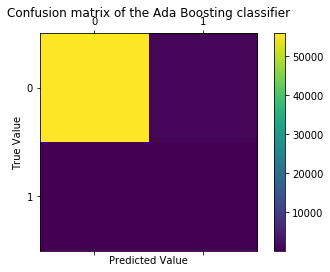

In [100]:
plot_conf_matrix(y_test, y_predAda, "Ada Boosting")

### Voting Ensemble

In [102]:
from sklearn.ensemble import VotingClassifier

In [105]:
t0 = time.time()
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = linear_model.SGDClassifier(max_iter=1000)
estimators.append(('SGD', model2))
model3 = SVC()
estimators.append(('SVM', model3))
model4 = KNeighborsClassifier(n_neighbors=3)
estimators.append(('KNN', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_oversampled_sm, y_oversampled_sm)
y_predEnsemble = ensemble.predict(X_test)
t1 = time.time()
print("Voting Ensemble took {:.2} s".format(t1 - t0))

Voting Ensemble took 3e+03 s


In [106]:
accuracyEnsembleRoS = accuracy_score(y_test, y_predEnsemble)
print("Accuracy of voting ensemble on balanced data is: %.2f%%" % (accuracyEnsembleRoS * 100.0))

Accuracy of voting ensemble on balanced data is: 99.91%


In [107]:
aucEnsembleRos = roc_auc_score(y_test, y_predEnsemble)
print("Area under the ROC of ensemble learning on balanced data is: %.4f" % (aucEnsembleRos))

Area under the ROC of ensemble learning on balanced data is: 0.9536


[[56830    45]
 [    8    79]]


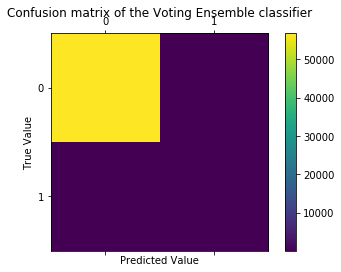

In [187]:
plot_conf_matrix(y_test, y_predEnsemble, "Voting Ensemble")

### Comparison of various classification models with respect to Area Under the ROC Curve.

<img src="accRoc.png">

###  Comparison of various classification models with respect to Time (Speed).
<img src="graph.png">

## Feature Importance

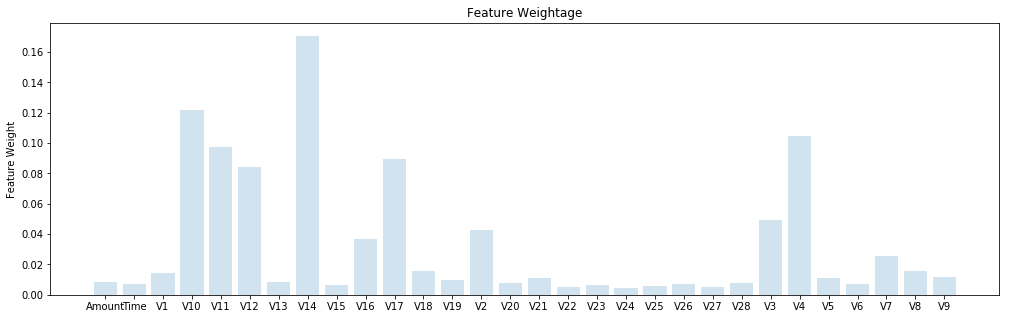

In [108]:
feature_weight = []
feature_names = []
feature_weight_name = {}
for i, j in sorted(zip(X.columns, forest.feature_importances_)):
    feature_weight.append(i)
    feature_names.append(j)
    feature_weight_name[i] = j

plt.figure(figsize = (17,5))
plt.bar(feature_weight, feature_names, align='center', alpha=0.2)
plt.ylabel('Feature Weight')
plt.title('Feature Weightage')
plt.show()

## Model Evaluation (Comparisons of various models)

In [150]:
from sklearn.metrics import roc_curve, auc

def getROCcurve(test_data, predicted_data, clasModel):
    fpr, tpr, thresholds = roc_curve(test_data,predicted_data)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for %s' % clasModel)
    plt.legend(loc="lower right")
    plt.show()


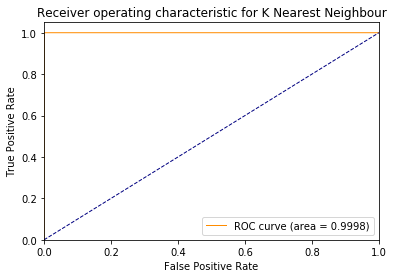

In [159]:
knnROC = getROCcurve(y_test, y_predKNN, 'K Nearest Neighbour')

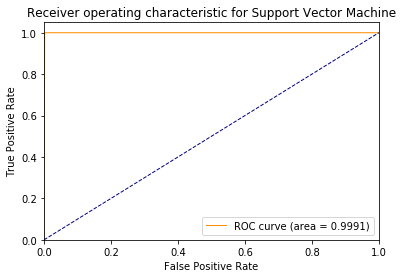

In [160]:
svmROC = getROCcurve(y_test, y_predSVM, 'Support Vector Machine')

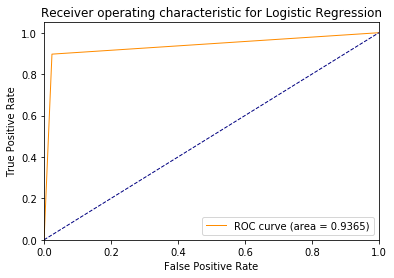

In [170]:
lrROC = getROCcurve(y_test, y_predLR, "Logistic Regression")

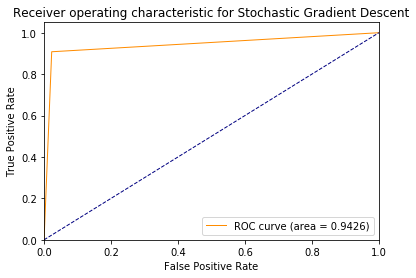

In [171]:
sgdROC = getROCcurve(y_test, y_predSGD, "Stochastic Gradient Descent")

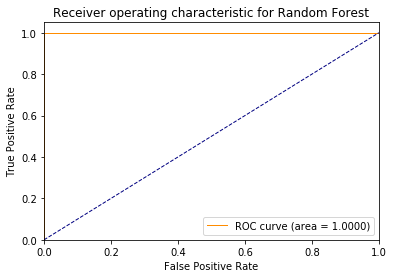

In [172]:
rfROC = getROCcurve(y_test, y_predRF, 'Random Forest')

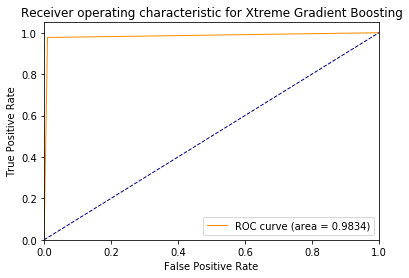

In [173]:
xgbROC = getROCcurve(y_test, y_predXGB, 'Xtreme Gradient Boosting')

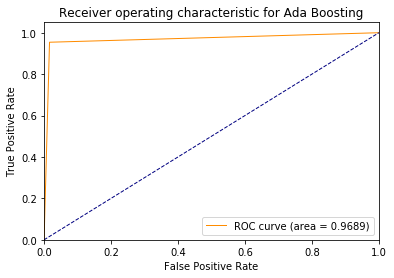

In [174]:
adaROC = getROCcurve(y_test, y_predAda, 'Ada Boosting')

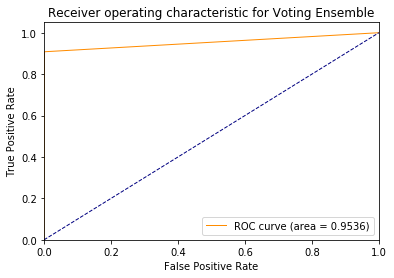

In [175]:
veROC = getROCcurve(y_test, y_predEnsemble, 'Voting Ensemble')

### Conclusions:

- In most cases, synthetic techniques like SMOTE and MSMOTE will outperform the conventional oversampling and undersampling methods.
- For better results, one can use synthetic sampling methods like SMOTE and MSMOTE along with advanced boosting methods like Gradient boosting and XG Boost.

### References:

https://www.infoworld.com/article/2907877/machine-learning/how-paypal-reduces-fraud-with-machine-learning.html
https://www.3pillarglobal.com/insights/credit-card-fraud-detection
https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd
https://www.datascience.com/blog/fraud-detection-with-tensorflow
https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
https://www.kaggle.com/gargmanish/how-to-handle-imbalance-data-study-in-detail
https://weiminwang.blog/2017/06/23/credit-card-fraud-detection-using-auto-encoder-in-tensorflow-2/
https://www.kaggle.com/azzion/credit-card-fraud-detection-using-neural-network
https://www.linkedin.com/pulse/analyzing-transaction-data-like-scientist-taha-mokfi/
https://datascience.stackexchange.com/questions/32818/train-test-split-of-unbalanced-dataset-classification
https://github.com/phatak-dev/spark-ml-kaggle/blob/master/python/credit_card_class_imbalance.ipynb
https://www.youtube.com/watch?v=m-S9Hojj1as
https://www.youtube.com/watch?v=EuBBz3bI-aA
https://www.datascience.com/blog/fraud-detection-with-tensorflow
https://towardsdatascience.com/detecting-financial-fraud-using-machine-learning-three-ways-of-winning-the-war-against-imbalanced-a03f8815cce9
https://www.kaggle.com/zhouhq/credit-fraud-detection-the-power-of-ensemble/notebook
https://github.com/nilaysen/Credit-Card-Fraud-Detection/blob/master/credit_card_fraud.ipynb
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
https://qiita.com/bmj0114/items/460424c110a8ce22d945